<a href="https://colab.research.google.com/github/Sagarjain93/Pharma_Medicines/blob/main/Pharma_medicines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Tite: Exploratory Analysis of Indian Pharmaceuticals Dataset**

#**1. Introduction**

This EDA aims to uncover patterns, distributions, and insights from a dataset of 253,973 medicines available in India. The dataset includes key features like product ID, name, price, manufacturer, type, packaging, and composition details. Through data profiling, visualizations, and summary statistics, we explore product availability, pricing trends, formulation completeness, and market diversity in the Indian pharmaceutical space.

**Potential Hypotheses to be explored **

**1.Higher-priced medicines are more likely to be discontinued.**
(Test by comparing price distributions across the Is_discontinued flag.)

**2.Some manufacturers dominate the market with a higher number of products.**
(Test by analyzing the frequency distribution of manufacturer_name.)

**3.Certain medicine types (e.g., tablets) are more common than others.**
(Test by checking the distribution of the type column.)

**4.Combination drugs (with short_composition2) tend to be more expensive.**
(Compare average price between entries with and without short_composition2.)

**5.Pack size is correlated with medicine price.**
(Extract numeric info from pack_size_label and check correlation with price(₹).)

**6.Discontinued medicines are more likely to come from lesser-known manufacturers.**
(Compare discontinuation rates across manufacturers.)



# **2. Dataset Description:**

**id** Unique identifier for each medicine entry.

**name**: Name of the medicine or drug product.

**price(₹)**: Price of the medicine in Indian Rupees.

**Is_discontinued**: Boolean flag indicating whether the medicine is discontinued (True) or still available (False).

**manufacturer_name**: Name of the company or brand that manufactures the medicine.

**type**: Form/type of the medicine (e.g., tablet, syrup, capsule).

**pack_size_label**: Label describing the packaging size or quantity (e.g., "10 tablets", "100 ml").

**short_composition1**: Primary active ingredient(s) in the medicine.

**short_composition2**: Secondary or additional active ingredient(s); may contain missing values.

# **3. Import Required Libraries**



We import Python libraries necessary for data manipulation and visualization

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4. Load The Dataset**



The dataset is loaded using the pandas library. The dataset has been uploaded to a GitHub repository. This approach allows the CSV file to be accessed directly via its raw URL, making the code cleaner and removing the need for manual authorization or drive mounting each time the notebook is run.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/4. Pharma/MEDICINE DATASET/A_Z_medicines_dataset_of_India.csv')

#**5. Inital Data Inspection**

To gain a foundational understanding of the dataset, we begin with an initial inspection that covers several essential aspects. This includes previewing the first few records to get a sense of the structure and values, examining the data types of each feature to ensure they align with expectations, and reviewing the overall shape and completeness of the dataset. We also generate statistical summaries for both numerical and categorical features to identify distributions, detect potential anomalies, and guide further steps in the analysis pipeline.

##**5.1 Preview Few Records**

### First Few Rows View

In [4]:
df.head()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


### Last Few Rows View

In [5]:
df.tail()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
253968,253969,Ziyapod 100mg Oral Suspension,62.3,False,Ziyana Lifesciences Pvt Ltd,allopathy,bottle of 30 ml Oral Suspension,Cefpodoxime Proxetil (100mg),NaN
253969,253970,Zemhart 30mg Tablet,54.0,False,Leeford Healthcare Ltd,allopathy,strip of 10 tablets,Diltiazem (30mg),NaN
253970,253971,Zivex 25mg Tablet,57.0,False,Euro Organics,allopathy,strip of 10 tablets,Hydroxyzine (25mg),NaN
253971,253972,ZI Fast 500mg Injection,152.0,False,Burgeon Health Series Private Limited,allopathy,vial of 1 Injection,Azithromycin (500mg),NaN
253972,253973,Zyvocol 1% Dusting Powder,110.0,False,GBK Healthcare,allopathy,bottle of 75 gm Dusting Powder,Clotrimazole (1% w/w),NaN


### Columns

In [6]:
df.columns

Index(['id', 'name', 'price(₹)', 'Is_discontinued', 'manufacturer_name',
       'type', 'pack_size_label', 'short_composition1', 'short_composition2'],
      dtype='object')

##**5.2 Check the Dataset Shape And Size**

### Shape Of Dataset

In [7]:
df.shape

(253973, 9)

**Interpretation**- *The data has 253973 rows and 9 columns*

### Size Of Dataset

In [24]:
df.size

2285757

##**5.3 Dataset Summary Overview**

Check for missing values and data types of each column.

###Data Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


**Interpretation**- *The dataset contains 253,973 records and 9 columns, covering medicine ID, name, price, manufacturer, type, pack size, and composition details. One column (short_composition2) has missing values. Data types include integers, floats, booleans, and object strings.*

###Data Types

In [26]:
df.dtypes

,0
id,int64
name,object
price(₹),float64
is_discontinued,bool
manufacturer_name,object
type,object
pack_size_label,object
short_composition1,object
short_composition2,object


##**5.4 Statistical Summary Of Dataset**

Generating statistical summary of numerical columns to understand their distribution, central tendency, and spread across the dataset

### Statistical Summary Of Numerical Columns

In [9]:
df.select_dtypes(include='number').describe().round()

,id,price(₹)
count,253973.0,253973.0
mean,126987.0,271.0
std,73316.0,3030.0
min,1.0,0.0
25%,63494.0,48.0
50%,126987.0,79.0
75%,190480.0,140.0
max,253973.0,436000.0


### Statistical Summary of Category Columns

In [10]:
df.select_dtypes(include='object').describe()

,name,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
count,253973,253973,253973,253973,253973,112171
unique,249398,7648,1,1929,8523,2980
top,NS 0.9% Infusion,Sun Pharmaceutical Industries Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),Rabeprazole (20mg)
freq,12,2986,253973,116540,6930,4743


##**5.5 Check For Duplicates , Null Values,Unique Values**

### Check Duplicates Row

In [28]:
df.duplicated().sum()

np.int64(0)

### Check Null Values /Nan Values

In [29]:
df.isnull().sum()

,0
id,0
name,0
price(₹),0
is_discontinued,0
manufacturer_name,0
type,0
pack_size_label,0
short_composition1,0
short_composition2,0


### Unique Values

In [ ]:
df.nunique()  # Display the number of unique values in each column

In [ ]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaNs
    print("-"*50)


#**6. Data Cleaning And Preprocessing**

In this section, we focus on identifying and handling issues such as missing values, incorrect data types, duplicates, and inconsistent entries. Effective data cleaning ensures the dataset is accurate, complete, and ready for reliable analysis

##**6.1 Handling Missing Values**

Identifying and addressing missing values to ensure data completeness and reliability for accurate analysis.

In [12]:
df.isnull().sum()

,0
id,0
name,0
price(₹),0
Is_discontinued,0
manufacturer_name,0
type,0
pack_size_label,0
short_composition1,0
short_composition2,141802


**Interpretation** - * The above data shows that the column short_composition2 has 141802 null data*

**Using Fillna() to replace the empty cell with 'NA'.**

In [42]:
#using fillna to replace the empty cell in the short_composition2 column
df['short_composition2'] = df['short_composition2'].fillna('NA')

##**6.2 Standardize Column Name**

Standardizing column names to ensure consistency, readability, and ease of use throughout the analysis.

In [15]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [16]:
df.columns

Index(['id', 'name', 'price(₹)', 'is_discontinued', 'manufacturer_name',
       'type', 'pack_size_label', 'short_composition1', 'short_composition2'],
      dtype='object')

##**6.3 Identify Numerical And Categorical Columns**

Identifying numerical and categorical columns to guide appropriate analysis, visualization, and preprocessing techniques.

In [17]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include='number').columns

In [18]:
# Display categorical columns
categorical_columns

Index(['name', 'manufacturer_name', 'type', 'pack_size_label',
       'short_composition1', 'short_composition2'],
      dtype='object')

In [19]:
# Display numerical columns
numerical_columns

Index(['id', 'price(₹)'], dtype='object')

##**6.4 Standardize Categorical Features And Explore Unique Values**

In this section, we clean the categorical columns by standardizing text formats—removing extra spaces and ensuring consistent casing. This step is essential to avoid misleading results when analyzing unique categories. After cleaning, we explore the unique values in each categorical column to understand the feature space and identify any anomalies or inconsistencies.

### Standardizing Categorical Features

In [20]:
# Clean categorical columns: strip whitespaces and lowercase all strings
for cols in categorical_columns:
  df[cols] = df[cols].str.strip().str.lower()

### Explore Unique Values in Categorical Features

In [21]:
for col in categorical_columns:
  print(f"Unique Values in {col}:")
  print(df[col].unique())
  print("\n")

Unique Values in name:
['augmentin 625 duo tablet' 'azithral 500 tablet' 'ascoril ls syrup' ...
 'zivex 25mg tablet' 'zi fast 500mg injection' 'zyvocol 1% dusting powder']


Unique Values in manufacturer_name:
['glaxo smithkline pharmaceuticals ltd' 'alembic pharmaceuticals ltd'
 'glenmark pharmaceuticals ltd' ... 'bliss life pharmaceuticals'
 'z plus remedies' 'anamiva life sciences']


Unique Values in type:
['allopathy']


Unique Values in pack_size_label:
['strip of 10 tablets' 'strip of 5 tablets' 'bottle of 100 ml syrup' ...
 'bottle of 6 gm oral suspension' 'bottle of 6 gm powder'
 'packet of 14 rheocap']


Unique Values in short_composition1:
['amoxycillin  (500mg)' 'azithromycin (500mg)' 'ambroxol (30mg/5ml)' ...
 'idarubicin (25mg)' 'artesunate (250mg)' 'artesunate (500mg)']


Unique Values in short_composition2:
['clavulanic acid (125mg)' 'na' 'levosalbutamol (1mg/5ml)' ...
 'formoterol (na)' 'linseed oil (10% w/w)' 'tazobactum (62.25mg)']




##**6.5 Outlier Detections for Numerical Features**

In this step, we investigate potential outliers in the numerical columns using boxplots. Outliers can indicate data entry errors or unusual behavior.

### Visualizing Outlier Through BoxPlots

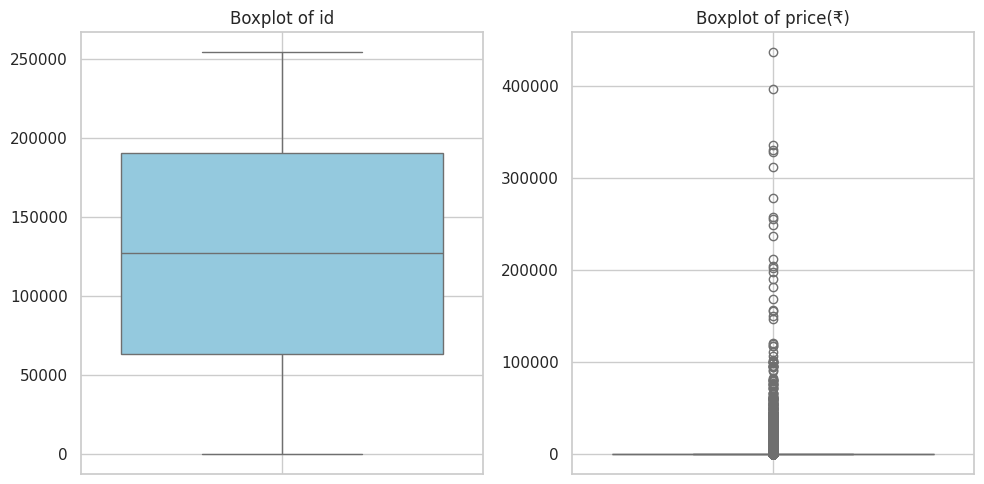

In [22]:
# Set up figure size
plt.figure(figsize=(5 * len(numerical_columns), 5))  # Dynamic width

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_columns):
    # Create dynamic subplots (1 row, N columns)
    plt.subplot(1, len(numerical_columns), i + 1)

    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretation**

**Boxplot of id:**

The id values are uniformly spread across the dataset.

As expected for a unique identifier, it shows no outliers or skewness.

This column should be treated as an identifier only, not used for analysis or modeling.

**Boxplot of price(₹):**

There is heavy right skew indicating a large number of high-price outliers.

Most medicine prices lie in a lower range, but a few medicines are priced above ₹100,000 and even ₹400,000.

These extreme values may distort summary statistics like mean — consider using the median or log transformation for analysis.

### Statistical Detection of Outliers using IQR

In addition to visual inspection through boxplots, we use the IQR method to programmatically detect potential outliers in the numerical features. This helps in identifying the number and position of values that lie far outside the normal range and could distort our analysis.


In [44]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower limit for non-outliers
    upper_bound = Q3 + 1.5 * IQR      # Upper limit for non-outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through numerical columns and report number of outliers in each
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected")

id: 0 outliers detected
price(₹): 22517 outliers detected


# **7. Data Visualization**

## **Univariate Analysis**

In [45]:
df.head()

,id,name,price(₹),is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,augmentin 625 duo tablet,223.42,False,glaxo smithkline pharmaceuticals ltd,allopathy,strip of 10 tablets,amoxycillin (500mg),clavulanic acid (125mg)
1,2,azithral 500 tablet,132.36,False,alembic pharmaceuticals ltd,allopathy,strip of 5 tablets,azithromycin (500mg),na
2,3,ascoril ls syrup,118.00,False,glenmark pharmaceuticals ltd,allopathy,bottle of 100 ml syrup,ambroxol (30mg/5ml),levosalbutamol (1mg/5ml)
3,4,allegra 120mg tablet,218.81,False,sanofi india ltd,allopathy,strip of 10 tablets,fexofenadine (120mg),na
4,5,avil 25 tablet,10.96,False,sanofi india ltd,allopathy,strip of 15 tablets,pheniramine (25mg),na


In [46]:
df.columns

Index(['id', 'name', 'price(₹)', 'is_discontinued', 'manufacturer_name',
       'type', 'pack_size_label', 'short_composition1', 'short_composition2'],
      dtype='object')

### Chart 1 Top 20 Medicines

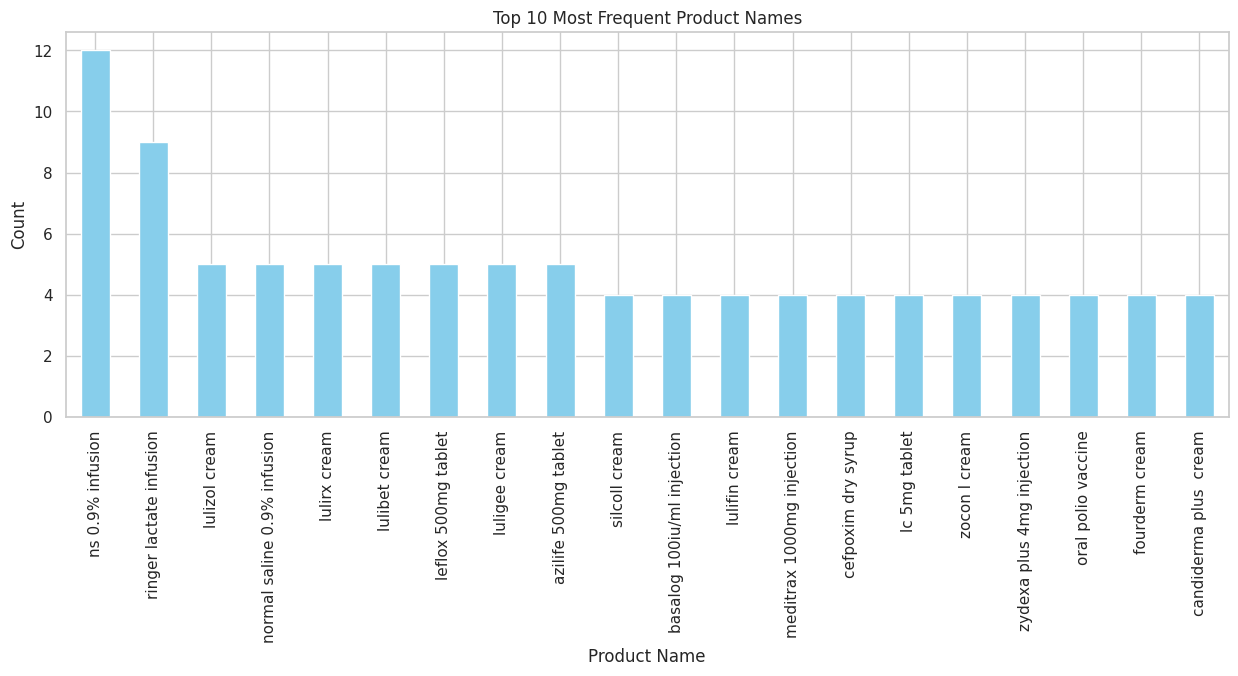

In [50]:
# Chart No.1  Data Visualization
df['name'].value_counts().head(20).plot(kind='bar', figsize=(15,5), color='skyblue')
plt.title("Top 20 Most Frequent Product Names")
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### Why did you pick the specific chart?


*  **Name** is categorical. Bar chart shows which products are most common in the dataset.

####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.